# Time Series Analysis of Product Sales

**Author:** Abdoun Ahcene Rayan 

**Date:** 30/03/2024 

**Institution:** The National Higher School Of Artificial Intelligence  

This project focuses on analyzing product sales through time series data, employing ARIMA models for forecasting. The dataset, obtained from Kaggle, covers sales data for the year 2010, providing a rich field for examining seasonal patterns and predicting future trends.


# Abstract
The objective of this study is to explore the seasonal dynamics and forecast future product sales. After preprocessing a Kaggle dataset to include only the relevant date and number of products sold, three ARIMA models were evaluated to determine the best fit based on the Bayesian Information Criterion (BIC). This analysis aims to uncover the underlying seasonal trends in product sales, optimizing model performance for accurate future sales predictions. Preliminary findings suggest a cosine-like seasonality, indicating the potential for further model refinement and investigation.


## Introduction

In the contemporary business landscape, the ability to predict future product sales with accuracy is invaluable. This project delves into time series analysis, utilizing a dataset that records the number of products sold over the course of 2010. The analysis focuses on identifying seasonal patterns and forecasting future sales, providing insights that could significantly impact inventory management and marketing strategies. Through the application of ARIMA models, this study seeks to contribute a methodological approach to forecasting in the domain of time series analysis.


In [57]:
# Load necessary libraries :
library(readr)
library(forecast)
library(tseries)

In [58]:
# Read the CSV file
data <- read.csv("MyTrainingData.csv")

# Extract the column of interest 
number_sold <- data$number_sold

# Create the time series
time_series <- ts(number_sold, start = c(2010, 1), frequency = 365)

# Calculate the mean inorder to see where the data oscillates over time 
mean_value <- mean(number_sold, na.rm = TRUE)
print(mean_value)

[1] 814.2055


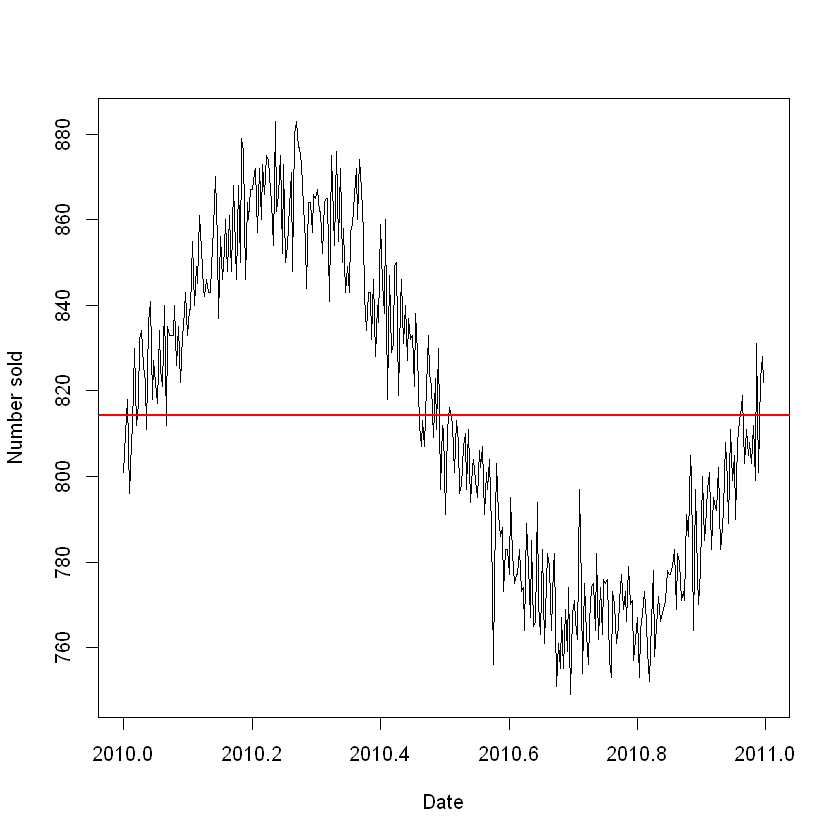

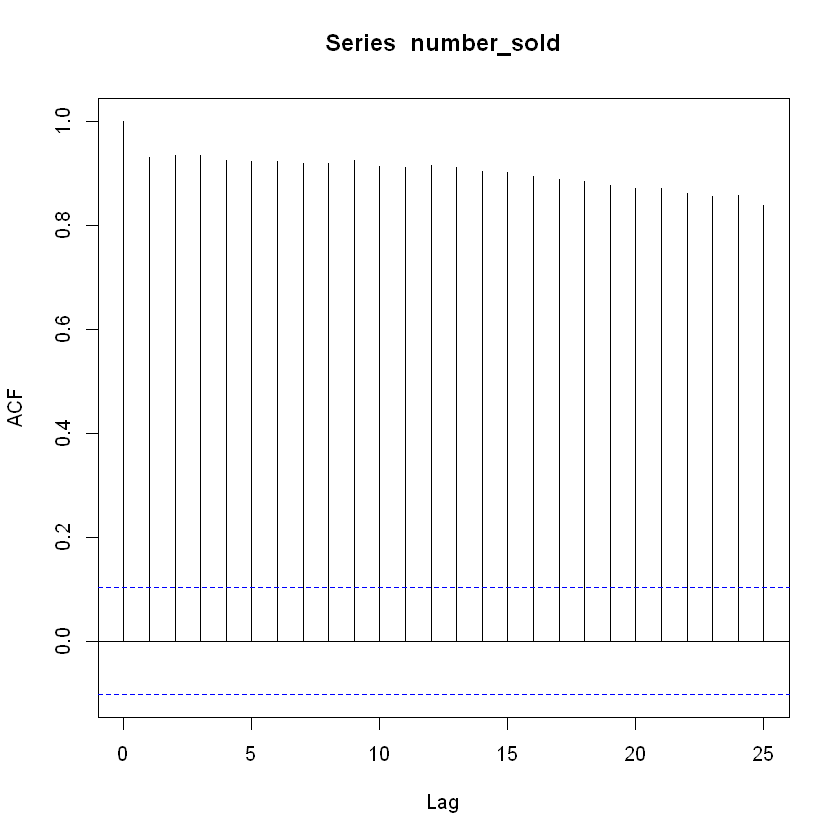


	Augmented Dickey-Fuller Test

data:  number_sold
Dickey-Fuller = -1.0421, Lag order = 7, p-value = 0.931
alternative hypothesis: stationary


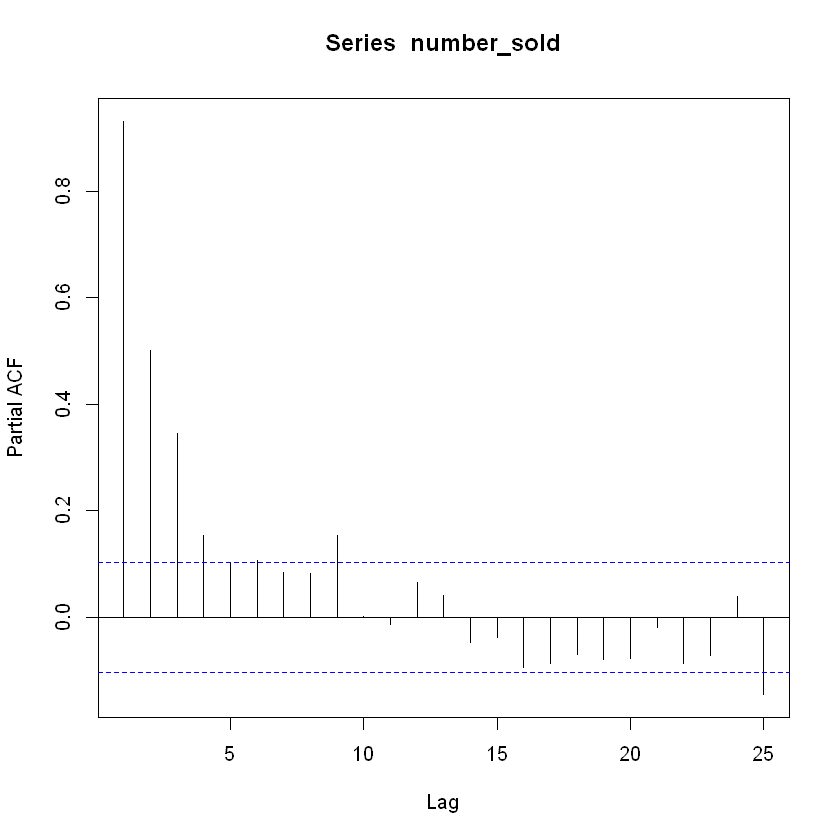

In [25]:
# Plot the time series
plot(time_series, xlab = "Date", ylab = "Number sold", type = "l")
abline(h = mean_value, col = "red", lwd = 2)

# Plot ACF and PACF of the sample
acf(number_sold) # implies to make the difference
pacf(number_sold)

adf.test(number_sold)

## Comments :
- we can see clearly that this time series oscillates around the mean
- Slow decay of the ACF suggesting the need of differencing
- The ADF test proves that the time series is not stationary

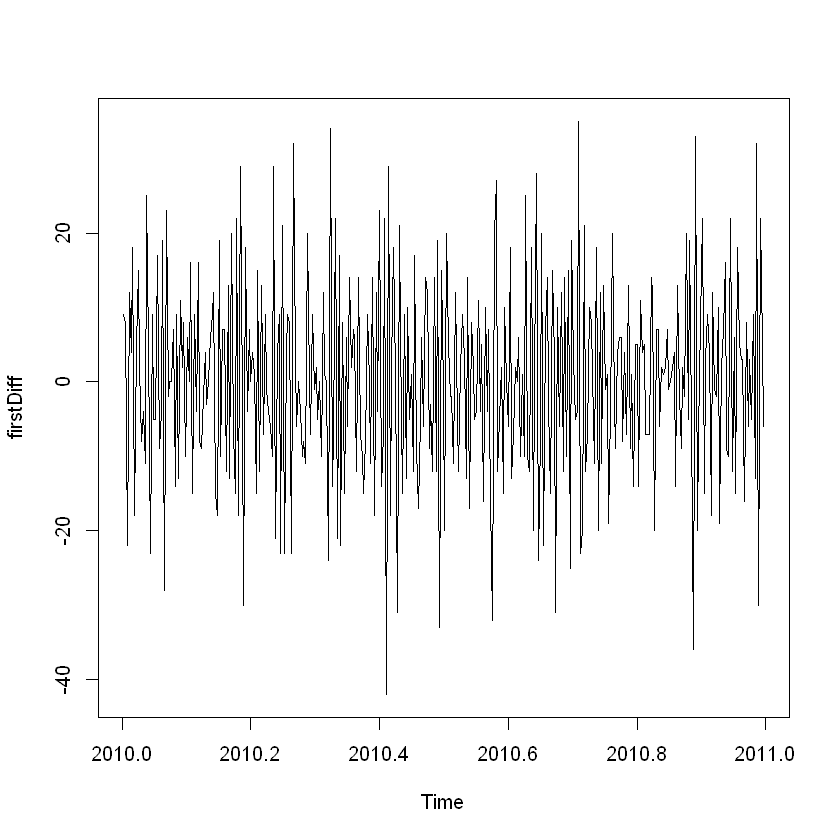

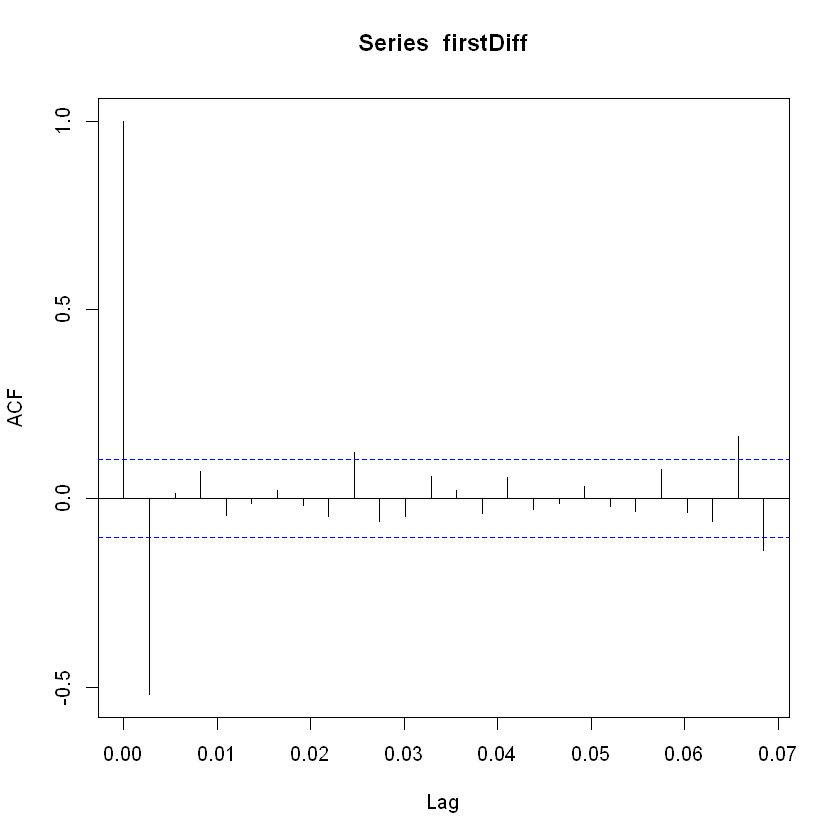

Warning message in adf.test(firstDiff):
"p-value smaller than printed p-value"


	Augmented Dickey-Fuller Test

data:  firstDiff
Dickey-Fuller = -10.582, Lag order = 7, p-value = 0.01
alternative hypothesis: stationary


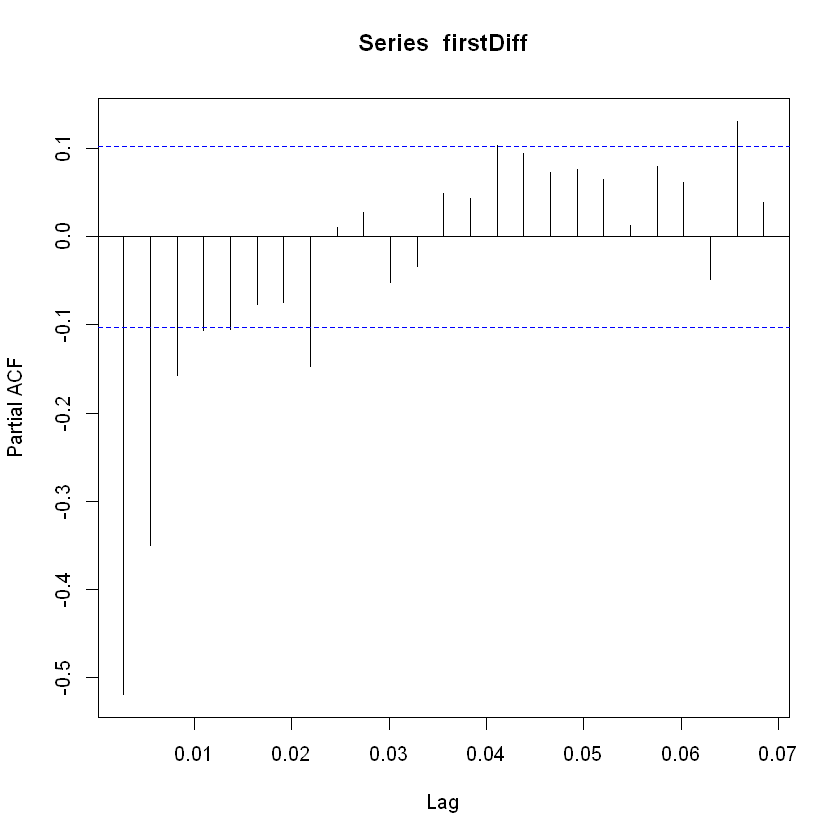

In [59]:
# Take the first difference
firstDiff <- diff(time_series) 
plot(firstDiff)

# Plot ACF and PACF of the diff
acf(firstDiff)
pacf(firstDiff)

# stationarity test:
adf.test(firstDiff)

## Comments:
- The first different really look like simple white noise ( Visually it looks stationary)
- The ACF suggests that there is some trace of a moving average process ( MA(1) or MA(2) )
- The PACF suggests that there is also some trace of an auto regressive process ( AR(1) or AR(3) or AR(4) )
- The ADF test confirmed that the first differrence is stationary

## Model Specification

The cornerstone of this analysis is the application of ARIMA (AutoRegressive Integrated Moving Average) models, chosen for their ability to model time series data that exhibits non-stationarities. This section details the process of selecting and specifying candidate models for the dataset, including the criteria for selection and the justification for focusing on ARIMA models. The dataset's seasonality prompted the exploration of several model configurations, aiming to capture the underlying patterns effectively.



Call:
lm(formula = number_sold ~ poly(time, 3, raw = TRUE), data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-37.519  -7.303  -0.053   7.320  29.587 

Coefficients:
                             Estimate Std. Error t value Pr(>|t|)    
(Intercept)                 7.975e+02  2.173e+00  367.04   <2e-16 ***
poly(time, 3, raw = TRUE)1  1.790e+00  5.134e-02   34.87   <2e-16 ***
poly(time, 3, raw = TRUE)2 -1.393e-02  3.257e-04  -42.76   <2e-16 ***
poly(time, 3, raw = TRUE)3  2.537e-05  5.851e-07   43.37   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 10.27 on 361 degrees of freedom
Multiple R-squared:  0.9226,	Adjusted R-squared:  0.9219 
F-statistic:  1433 on 3 and 361 DF,  p-value: < 2.2e-16


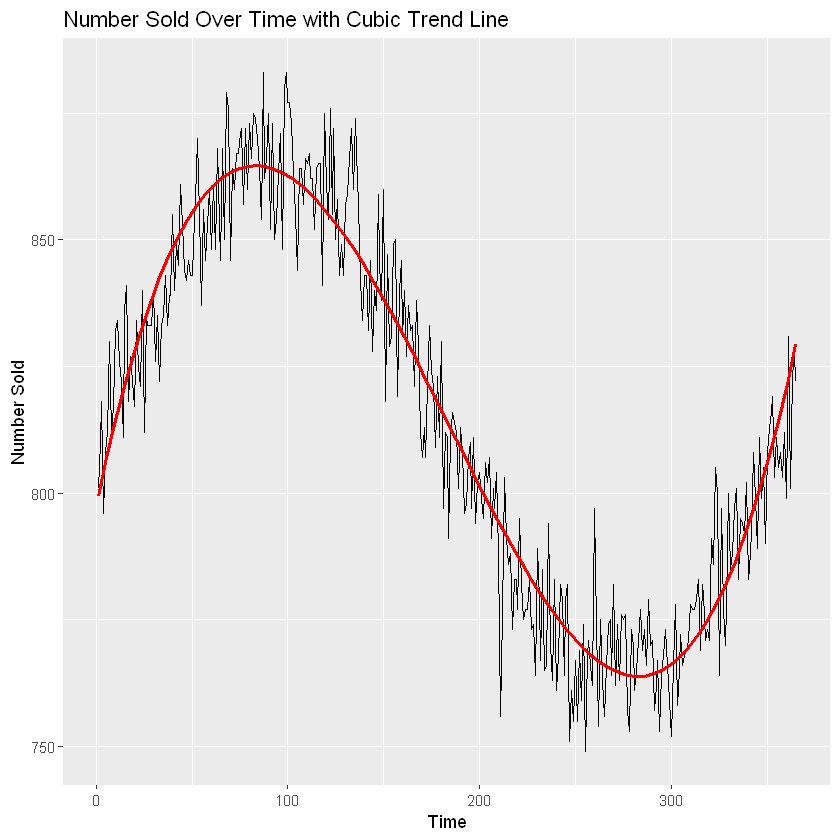

In [60]:
library(readr)
library(ggplot2)

# Load the data
data <- read.csv("MyTrainingData.csv")

number_sold <- data$number_sold


time <- 1:length(number_sold) # since the data is daily

# Fit a cubic model
model <- lm(number_sold ~ poly(time, 3, raw=TRUE), data=data)

# Check the summary of the model to get the coefficients
summary(model)

# Plot the data and the fitted cubic trend line
ggplot(data, aes(x=time, y=number_sold)) +
  geom_line() +
  geom_smooth(method="lm", formula=y~poly(x, 3, raw=TRUE), se=FALSE, color="red") +
  labs(x="Time", y="Number Sold", title="Number Sold Over Time with Cubic Trend Line")


## Comments:
Well, this cubic model is actually giving a nice look at the trend of the data set but not capturing the seasonal aspect. We shall remember to add this fit to the uppcoming models so that we increase their accuracies.


Call:
arima(x = firstDiff, order = c(1, 1, 1))

Coefficients:
          ar1      ma1
      -0.5177  -1.0000
s.e.   0.0448   0.0093

sigma^2 estimated as 135.5:  log likelihood = -1409.53,  aic = 2825.07

Training set error measures:
                     ME    RMSE      MAE MPE MAPE      MASE       ACF1
Training set -0.4401298 11.6232 9.140959 NaN  Inf 0.4786049 -0.1827035


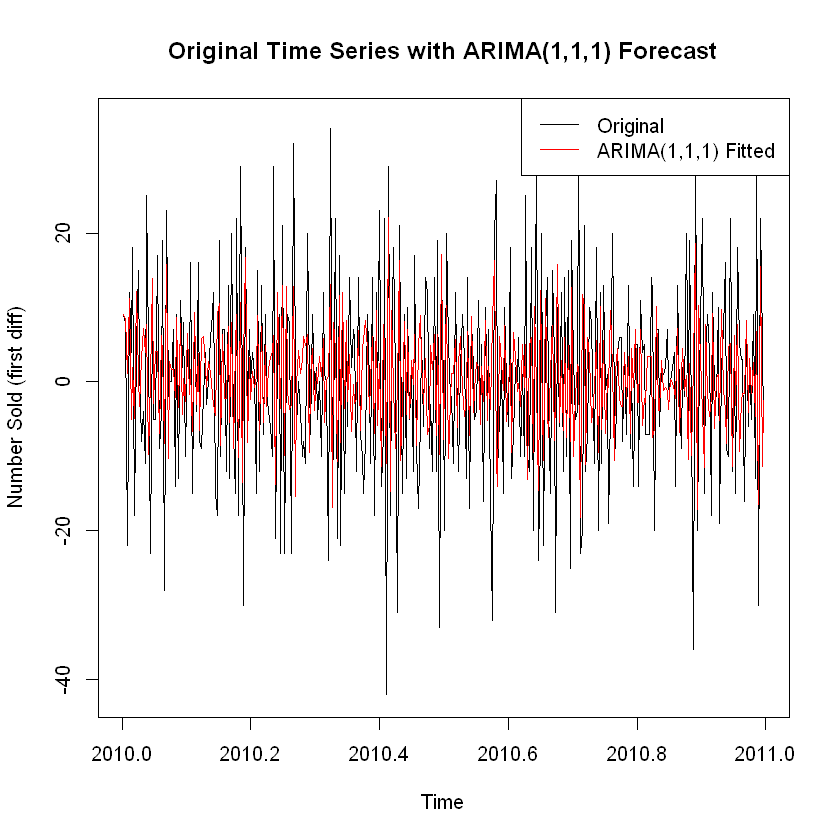

In [61]:

# Fit ARIMA model (1,1,1)
fit <-arima(firstDiff , order = c(1,1,1))
summary(fit)
# Forecast future values
forecasts <- forecast(fit)

# Plot original time series and ARIMA(1,1,1) forecast
plot(firstDiff, type = "l", xlab = "Time", ylab = "Number Sold (first diff)", main = "Original Time Series with ARIMA(1,1,1) Forecast") # nolint: line_length_linter.
lines(forecasts$fitted, col = "red")
legend("topright", legend = c("Original", "ARIMA(1,1,1) Fitted"), col = c("black", "red"), lty = 1) 

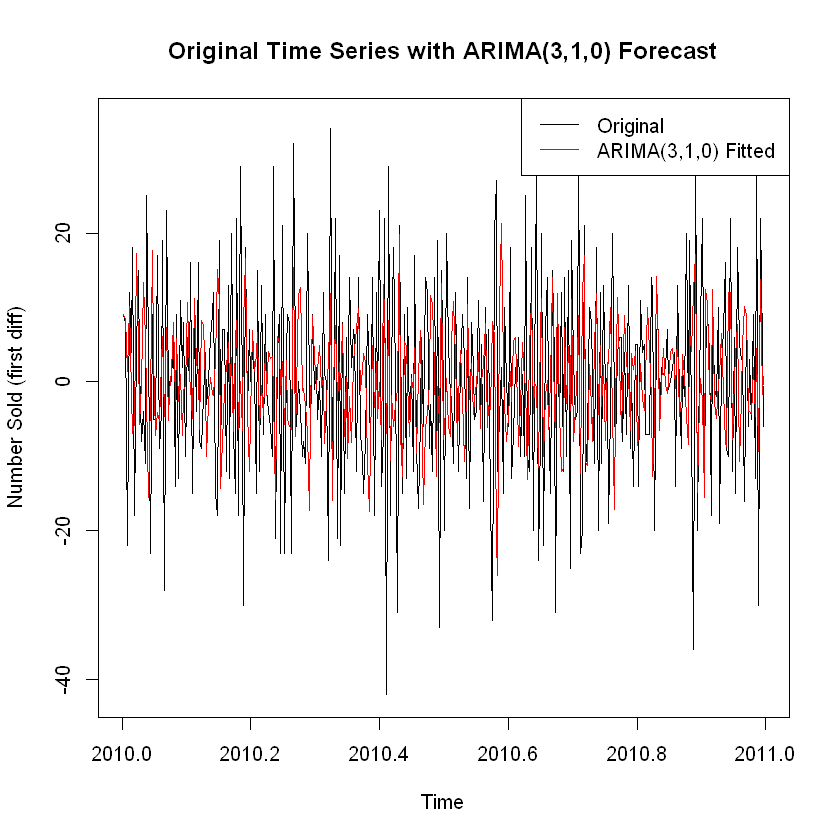

In [62]:
# Fit ARIMA model (3,1,0)
fit2 <- arima(firstDiff, order = c(3, 1, 0))
forecasts2 <- forecast(fit2)

# Plot original time series and ARIMA(4,1,0) forecast
plot(firstDiff, type = "l", xlab = "Time", ylab = "Number Sold (first diff)", main = "Original Time Series with ARIMA(3,1,0) Forecast") # nolint: line_length_linter.
lines(forecasts2$fitted, col = "red")
legend("topright", legend = c("Original", "ARIMA(3,1,0) Fitted"), col = c("black", "red"), lty = 1)

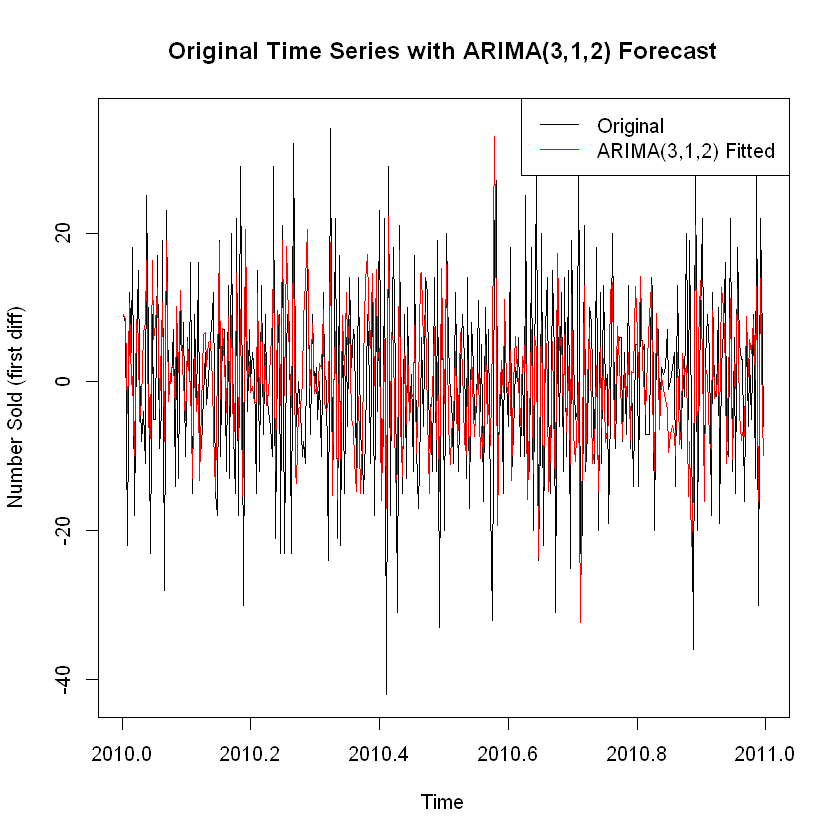

In [63]:
# fit ARIMA(3,1,2) model
fit3 <- arima(firstDiff, order = c(3, 1, 2))
forecasts3 <- forecast(fit3)
# Plot original time series and ARIMA(3,1,2) forecast
plot(firstDiff, type = "l", xlab = "Time", ylab = "Number Sold (first diff)", main = "Original Time Series with ARIMA(3,1,2) Forecast") # nolint: line_length_linter.
lines(forecasts3$fitted, col = "red")
legend("topright", legend = c("Original", "ARIMA(3,1,2) Fitted"), col = c("black", "red"), lty = 1) # nolint: line_length_linter.

## Fitting and Diagnostics

After specifying the candidate ARIMA models, this segment discusses the fitting process and the diagnostic checks performed to assess model adequacy. Particular attention was paid to the residual analysis, ensuring that the assumptions of the models were met. The Bayesian Information Criterion (BIC) was instrumental in selecting the final model, providing a balance between model complexity and fit.



	Shapiro-Wilk normality test

data:  std_residuals
W = 0.99262, p-value = 0.06958


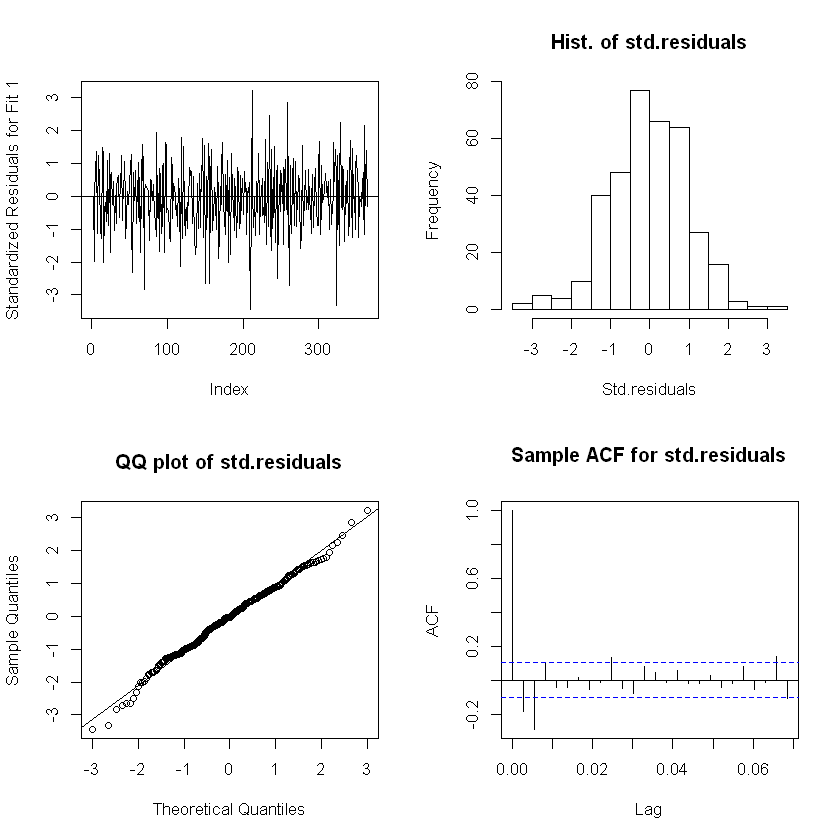

In [64]:
# After I chose 3 potential arima model, I'll proceed with the residual analysis
# fit1
# Extract residuals from the fitted ARIMA model bcz it couldn't using rstudent for some reason !
# fit ARIMA(1,1,1)
residuals_fit <- residuals(fit)
std_residuals <- residuals_fit / sqrt(var(residuals_fit))


par(mfrow = c(2,2))
plot(y = std_residuals, x = 1:length(residuals_fit),xlab = "Index", ylab = "Standardized Residuals for Fit 1",type = 'l')
abline(h = 0)
hist(std_residuals,main="Hist. of std.residuals",xlab="Std.residuals")
qqnorm(std_residuals,main="QQ plot of std.residuals")
qqline(std_residuals)
acf(std_residuals,main="Sample ACF for std.residuals")
shapiro.test(std_residuals) #  fail to reject the null hypothesis at the 0.05 significance level.(normal)
#W = 0.99393, p-value = 0.2972

## Comments:
- The Shapiro wilk test suggest that we can't reject the null hypothesis ( it is normally distributed)
- The QQ-plot also is very nicely fitted in the line y = x suggesting that it has a high degree of normality
- The histogram also is suggesting for normality


	Shapiro-Wilk normality test

data:  std_residuals_fit2
W = 0.99456, p-value = 0.2239


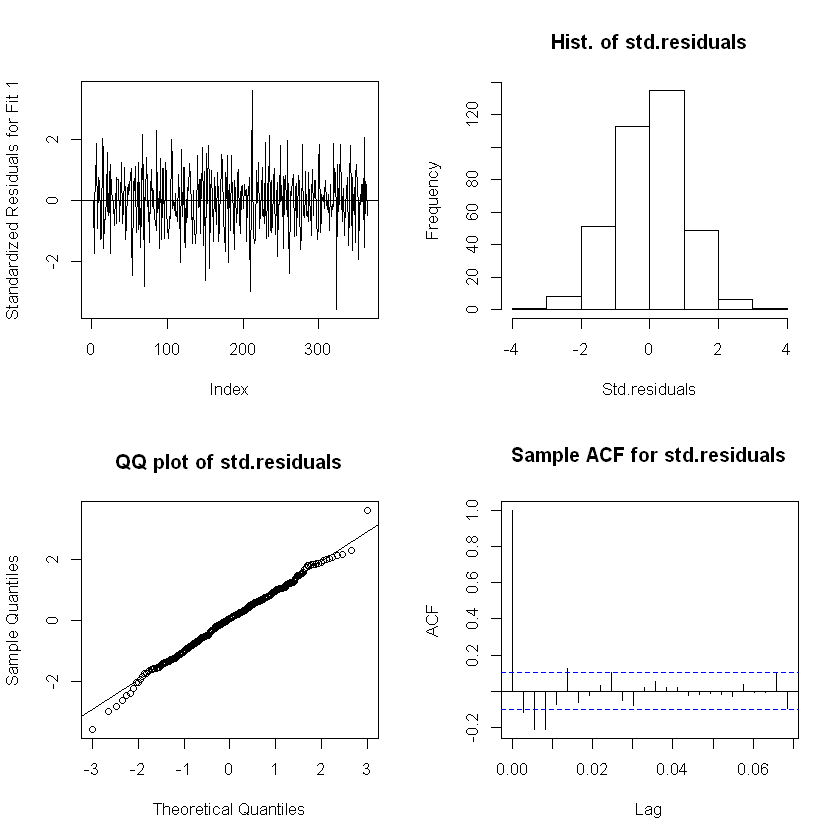

In [65]:
# let's concentrate on the fit2 ARIMA(3,1,0)
residuals_fit2 <- residuals(fit2)
std_residuals_fit2 <- residuals_fit2 / sqrt(var(residuals_fit2))

par(mfrow = c(2,2))
plot(y = std_residuals_fit2, x = 1:length(residuals_fit2),xlab = "Index", ylab = "Standardized Residuals for Fit 1",type = 'l')
abline(h = 0)
hist(std_residuals_fit2,main="Hist. of std.residuals",xlab="Std.residuals")
qqnorm(std_residuals_fit2,main="QQ plot of std.residuals")
qqline(std_residuals_fit2)
acf(std_residuals_fit2,main="Sample ACF for std.residuals")
shapiro.test(std_residuals_fit2) # also normal 
# W = W = 0.99487, p-value = 0.4461

## Comments:
- The Shapiro wilk test suggest that we can't reject the null hypothesis, then it is normally distributed
- The QQ-plot is not as alined as the first one (important for the model specification)
- The histogram seems to suggest normality


	Shapiro-Wilk normality test

data:  std_residuals_fit3
W = 0.99517, p-value = 0.3179


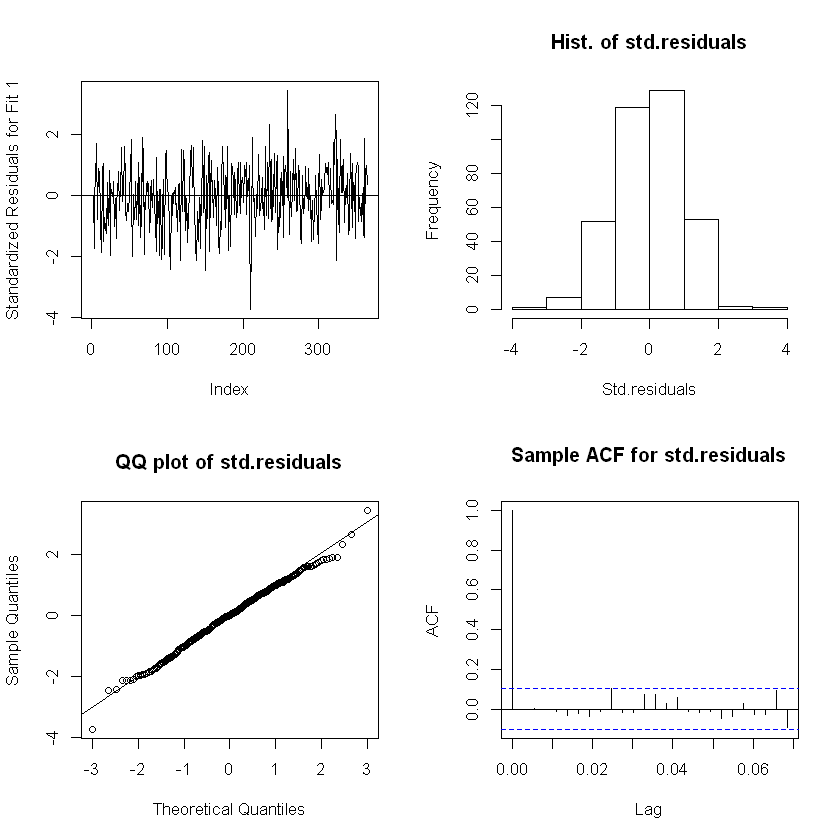

In [66]:
# fit3 ARIMA(3,1,2)
residuals_fit3 <- residuals(fit3)
std_residuals_fit3 <- residuals_fit3 / sqrt(var(residuals_fit3))

par(mfrow = c(2,2))
plot(y = std_residuals_fit3, x = 1:length(residuals_fit3),xlab = "Index", ylab = "Standardized Residuals for Fit 1",type = 'l')
abline(h = 0)
hist(std_residuals_fit3,main="Hist. of std.residuals",xlab="Std.residuals")
qqnorm(std_residuals_fit3,main="QQ plot of std.residuals")
qqline(std_residuals_fit3)
acf(std_residuals_fit3,main="Sample ACF for std.residuals")
shapiro.test(std_residuals_fit3) # also
# W = 0.99325, p-value = 0.2172

## Comments:
- The Shapiro wilk test suggests for normality
- The QQ-plot is better looking that the ones before 
- The histogram is also suggesting for normality

## Brainstorming:
For instance, all three models seem to fit the dataset and the residuals suggest that all of them are pretty good models, I tend to prefer the last one ARIMA(3,1,2) for now.

## Choosing the model among the list of models

In [67]:
BIC_values <- BIC(fit,fit2,fit3)
BIC_values

,df,BIC
fit,3,2836.750
fit2,4,2938.158
fit3,6,2754.803


Using the BIC (Bayesian information criterion), we should chose the model that has the smallest value suggesting in this case the last model (ARIMA(3,1,2)) as the best model so far

## Forecasting

Forecasting future sales is the ultimate goal of this analysis. This section outlines the approach taken to predict future observations, including the technique of withholding a subset of the data for validation purposes. By comparing the forecasts against actual sales data, the model's predictive performance was evaluated, highlighting the effectiveness of the chosen ARIMA model in capturing the sales data's seasonal trends.


                     ME     RMSE      MAE          MPE     MAPE MASE
Training set  0.1440835 10.51633 8.389951  0.003187006 1.031897  NaN
Test set     -3.9823608 11.19383 9.727448 -0.505172526 1.197253  NaN
                      ACF1 Theil's U
Training set  0.0005223855        NA
Test set     -0.1386781749 0.6175147


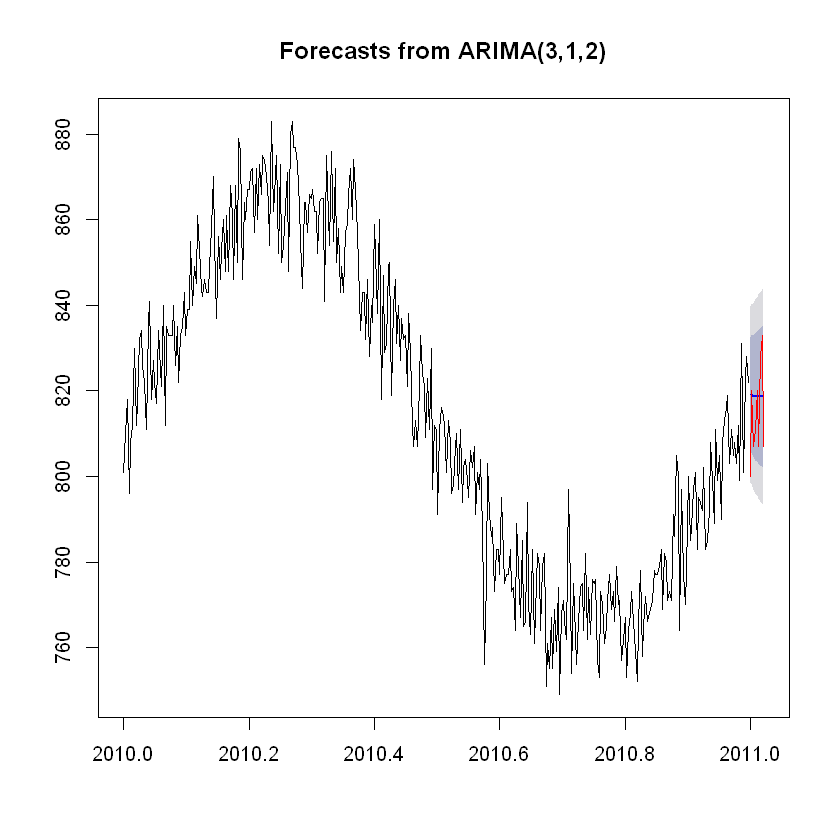

In [68]:
library(readr)
library(forecast)

# Read the CSV file
data <- read.csv("MyTrainingData.csv")
test <- read.csv("MyTestingData.csv")
number_sold <- data$number_sold

# Create the time series from the training data
time_series <- ts(number_sold, start = c(2010, 1), frequency = 365)

# Create the time series from the test data
test_ts <- ts(test$number_sold, start = c(2011, 1), frequency = 365)

# Fit an ARIMA model to the non-differenced training data
arima_model <- arima(time_series , order = c(3,1,2))

# Forecast the number of values equivalent to the length of the test set
arima_forecast <- forecast(arima_model, h=length(test$number_sold))

# Plot the forecasted values against the actual test data
plot(arima_forecast)
lines(test_ts, col = 'red', xlab="Time", ylab="Number Sold")
lines(seq(along=arima_forecast$mean) + length(time_series), arima_forecast$mean, col="blue")

# Compare the forecast with the original test data
accuracy_metrics <- accuracy(arima_forecast, test_ts)
print(accuracy_metrics)


## Comments:
- The accuracy metrics are clear, this si not the best model we are looking for since it continuously underpredicting the actual values.
- It is missing the trend (the blue line is more likely horizontal)
- The mean error is negative which implies that the forecasts are, on average, lower than the actual values.
- The Mean Absolute Error is high which suggest that the forecast is not very accurate.
- The rest of the metrics are suggesting that the model is good in the training data but not that good in the testing phase.
- This model is actually neither good nor bad, it gave a good prediction in the first lag but then continued as a strait line.
- The problem is that it completely misses the seasonality part of the data.
- I'will try to add a linear model (the cubic one we made in the begining) to it and some automatic seasonality patterns to see it I could get better results.

## New approach
I'll use the so called TBATS model (Exponential smoothing state space model with Box-Cox transformation, ARMA errors, Trend and Seasonal components) to add a linear trend + some seasonality.

The tbats() function automatically detects and models both the trend and seasonality in your data. It uses a combination of techniques:

Trigonometric terms for multiple seasonal periods (hence the "T" in TBATS),
Box-Cox transformation to stabilize variance,
ARMA errors for autocorrelation,
Trend (both damped or undamped),
Seasonal components modeled using a Fourier series

**Source:** ChatGPT

                  Length Class  Mode     
lambda               0   -none- NULL     
alpha                1   -none- numeric  
beta                 0   -none- NULL     
damping.parameter    0   -none- NULL     
gamma.one.values     1   -none- numeric  
gamma.two.values     1   -none- numeric  
ar.coefficients      0   -none- NULL     
ma.coefficients      0   -none- NULL     
likelihood           1   -none- numeric  
optim.return.code    1   -none- numeric  
variance             1   -none- numeric  
AIC                  1   -none- numeric  
parameters           2   -none- list     
seed.states          3   -none- numeric  
fitted.values      365   ts     numeric  
errors             365   ts     numeric  
x                 1095   -none- numeric  
seasonal.periods     1   -none- numeric  
k.vector             1   -none- numeric  
y                  365   ts     numeric  
p                    1   -none- numeric  
q                    1   -none- numeric  
call                 2   -none- ca

                     ME      RMSE      MAE        MPE     MAPE MASE
Training set  0.6010215  9.695047 7.864918  0.0563691 0.965813  NaN
Test set     -6.6773800 11.735383 9.988275 -0.8343998 1.233128  NaN
                     ACF1 Theil's U
Training set -0.002978484        NA
Test set     -0.326979326 0.6753452


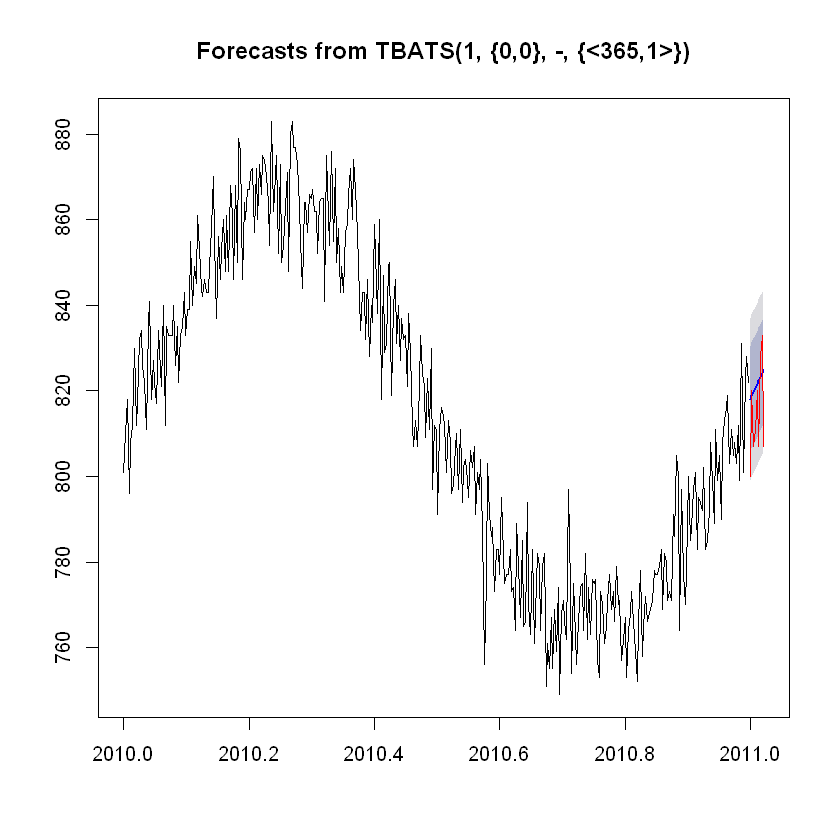

In [69]:
library(readr)
library(forecast)

# Read the CSV file
data <- read.csv("MyTrainingData.csv")
test <- read.csv("MyTestingData.csv")

# Convert number_sold to a ts object
number_sold <- ts(data$number_sold, start=c(2010,1), frequency=365)

# Fit a TBATS model, which can capture both trend and seasonality
tbats_model <- tbats(number_sold)
summary(tbats_model)
# Forecast with TBATS model
tbats_forecast <- forecast(tbats_model, h=length(test$number_sold))

# Plot the forecast
plot(tbats_forecast)
lines(ts(test$number_sold, start=c(2011,1), frequency=365), col='red')

# Calculate accuracy metrics
test_ts <- ts(test$number_sold, start=c(2011,1), frequency=365)
accuracy_metrics <- accuracy(tbats_forecast, test_ts)
print(accuracy_metrics)


## Comments:
- The accuracy metrics are giving better results, but still Theil's U statistic is less than 1 meaning that the model is better than a naive one but there is a better one.
- This is better than the ARIMA(3,1,2) because it captured the trend but not the seasonality pattern.

# Discussion## Summary:
- In the first hand, I plotted the time series and its ACF.
- The ACF suggested that I must differenciate (the slow decay).
- I then made sure that the time series was not stationary using the ADF test.
- I took the fist difference and checked that it was stationary using the ADF test.
- I first tried a cubic fit which captured the trend but completely missed the seasonal pattern.
- I then drew the ACF and PACF of the first difference.
- I suggested three potential ARIMA models : ARIMA(1,1,1) , ARIMA(3,1,0) , ARIMA(3,1,2).
- I proceeded with the residual analysis for each model (Shapiro wilk test , histograms , QQ-plot and ACF for independence check) and each one of them had pretty normal residuals.
- I used the BIC technique to chose one of these models and the lowest value was optained from ARIMA(3,1,2) as expected.
- The forecast is the part that took me so long since I couldn't believe that a model could possible be underfitting that much, the model choice was clearly not the best. I think there might be other approaches that I don't know, I even tried with the function auto.arima to make sure that I picked the right parameters for the ARIMA model, and then I tried to continue using the cubic model I did in the beginning and add some seasonality (I couldn't because the harmonic function we did in the TD won't work for some reason), then I finally searched a method that makes an automatic fit for the data (TBATS model) and I was clearly disappointed seeing the results.
- I think the data set itself is complicated since the data itself is probably highly related to other features that were not studied, but there was no way to change it at the middle of the work. 
d.
